In [1]:
import pandas as pd

dataset = pd.read_csv('car19.csv')
dataset.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.6
1,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.1
2,2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.7
3,3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.2
4,4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.8


In [2]:
import numpy as np
columns = dataset.columns.drop(['car_ID'])
index_ejection_count_map = {}
for col_name in columns:
    col = dataset[col_name]
    m = np.mean(col)
    std = np.std(col)
    left = m - 2.698 * std
    right = m + 2.698 * std

    fail_index = col[(col<left)|(col>right)].index
    for i in fail_index:
        if index_ejection_count_map.get(i) is None:
            index_ejection_count_map[i] = 1
        else:
            index_ejection_count_map[i] += 1


In [3]:
all_count = len(index_ejection_count_map)
ones = len([k for k, v in index_ejection_count_map.items() if v == 1])
two_and_mode = all_count - ones
print(f'Все с выбросами: {all_count}\nЕдиничные выбросы: {ones}\nМножественные выбросы: {two_and_mode}')

Все с выбросами: 19
Единичные выбросы: 8
Множественные выбросы: 11


In [4]:
new_dataset = dataset.drop(index=[k for k, v in index_ejection_count_map.items() if v == 1])
new_dataset.to_csv('new_car.csv')

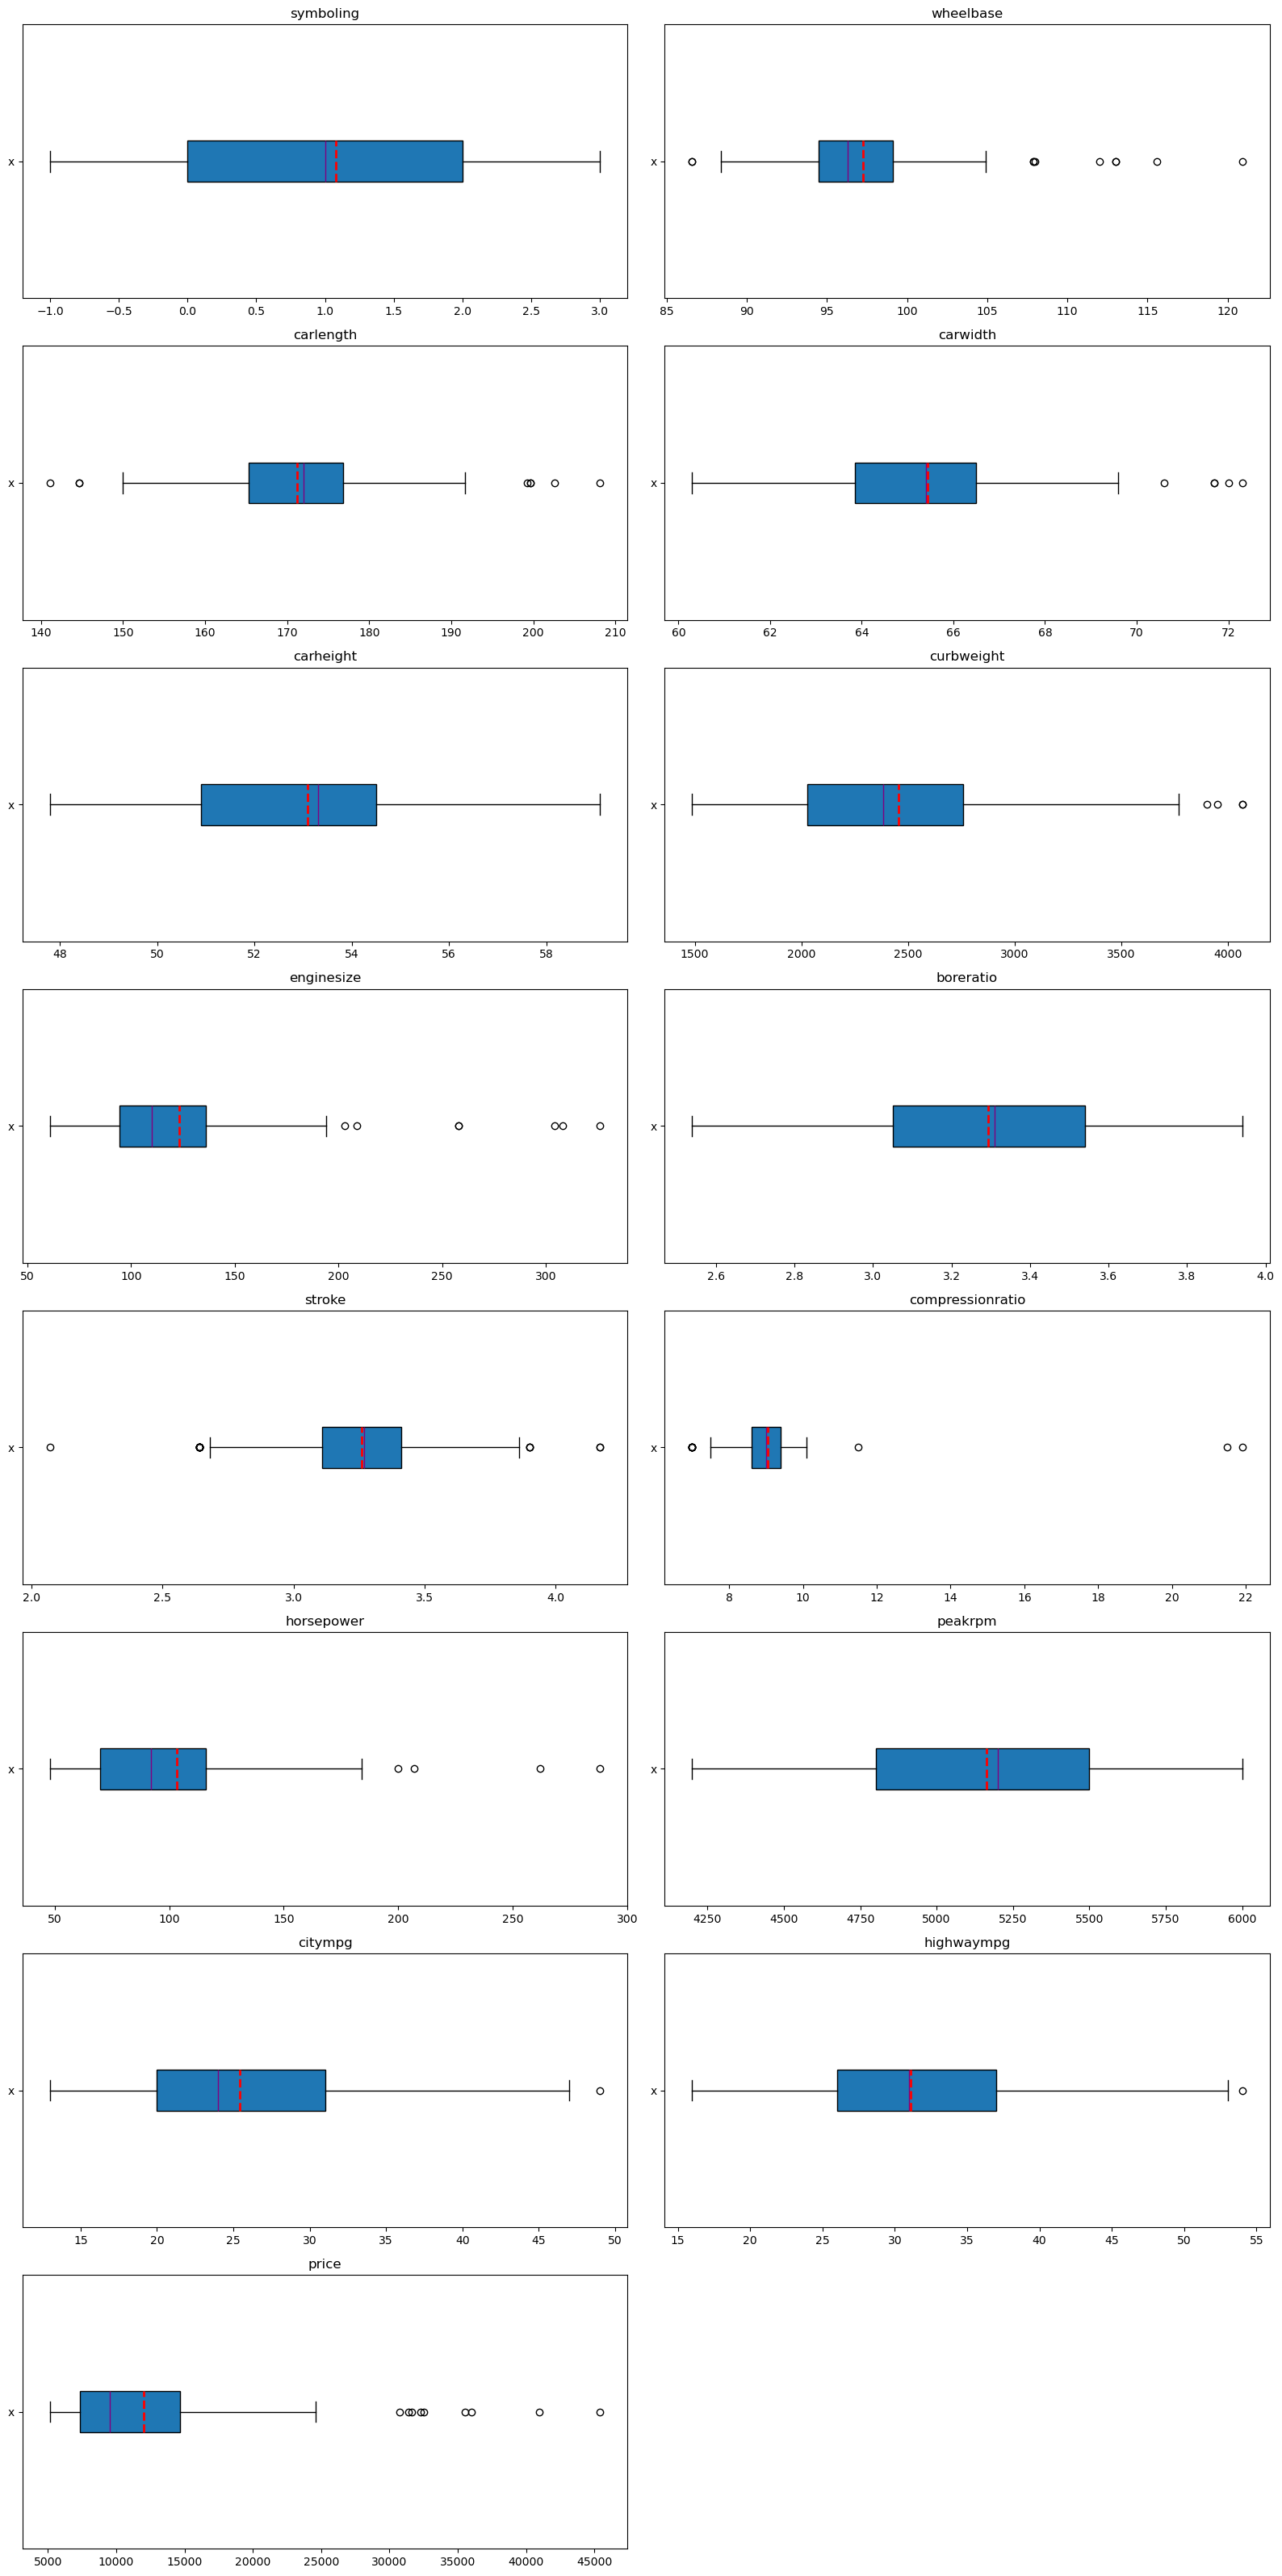

In [5]:
from plotly.offline import download_plotlyjs, plot, iplot
import matplotlib.pyplot as plt

series = []
for t in new_dataset.columns.drop(['car_ID']):
    series.append(new_dataset[t])

# Динамически определяем количество строк и столбцов
num_plots = len(series)
num_rows = (num_plots + 1) // 2
num_cols = min(2, num_plots)  

f_hist, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 8, num_rows * 4))
axes = axes.flatten()

 # Перебираем ряды и оси с помощью zip, чтобы избежать ошибки индексации
for s, ax in zip(series, axes):
    ax.set_title(s.name)
    ax.boxplot(x=s, vert=False, showmeans=True, meanline=True, labels=('x'), patch_artist=True, medianprops={'linewidth': 1, 'color': 'purple'}, meanprops={'linewidth': 2, 'color': 'red'})

# Удаляем пустые подзаголовки, если их больше, чем необходимо
for j in range(num_plots, len(axes)):
    f_hist.delaxes(axes[j])

plt.tight_layout()
plt.show()

Из новых графиков следует, что статистика по выборкам осталась неизменной, что свидетельствует о приемлемом способе удаления выбросов.